<a href="https://colab.research.google.com/github/juanPellegrini11/Arboles_decision/blob/main/Arboles_decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrega 1 - Árboles de decisión

Grupo 35:

    Juan Pellegrini       C.I.: 4.814.284-2
    Emiliano Hernández    C.I.: 4.660.612-3

# 1. Objetivo
El objetivo principal de esta tarea es profundizar en la implementación del algoritmo ID3 para la construcción de árboles de decisión y el uso y experimentación de los efectos del uso de los hiperparámetros "min_split_gain" y "min_samples_split", así como también ahondar en el tema de árboles de decisión en general mediante el uso de los algoritmos "Decision tree classifier" y "Random forest classifier".


# 2. Preprocesamiento de datos

El dataset utilizado en esta tarea cuenta con 36 atributos y 4424 instancias. Recopila datos sobre estudiantes y su éxito o no en lo relativo a su avance o permanencia en sus carreras universitarias. No tiene datos faltantes.
De los 36 atributos del juego de datos, 7 son atributos continuos y fueron discretizados. Estos son:

    Previous qualification (grade)
    Admission grade
    Curricular units 1st sem (grade)
    Curricular units 2nd sem (grade)
    Unemployment rate
    Inflation rate
    GDP

Para la discretización de los atributos se utilizó la clase KBinsDiscretizer que forma parte de la biblioteca Scikit Learn. Se decidió partir estos atributos continuos en dos grupos mediante la estrategia de agrupamiento “quantile”, la cual permite que cada grupo tenga cantidad de instancias iguales.

Por último, se codificó el atributo “Target” de la siguiente forma:

    Valor original     Valor codificado
        Dropout                 0
        Graduate                1
        Enrolled                1


# 3. Evaluación de resultados

Para la evaluación de resultados se toman en consideración las siguientes métricas:

* Exactitud
* Precisión
* Recall
* Medida-F

Estas se calculan a partir del nivel de predicción de etiquetas correctas sobre el subset de datos de validación.
Además se calculan, una vez elegidos los disintos hiperparámetros, estas mismas medidas sobre el subset de datos de testeo.


# 4. Experimentación

En esta sección se presenta el código y comentan las consideraciones que se tomaron para la obtención de los resultados.
  




Importación de librerías y de datos

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

students = pd.read_csv('/content/data.csv', delimiter = ';')

###Preprocesamiento y data profiling

####Información de atributos del dataset

In [ ]:
pd.set_option('display.max_columns', None)
students.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [ ]:
print(f'{"Columna":<10} {"Datos_distintos":<18} {"Tipo_dato":<10}')
print('')
for column in students.columns:
  print(f'{str(students[column].dtypes):<10} {str(len(students[column].unique())):<18} {column:<10}')

Columna    Datos_distintos    Tipo_dato 

int64      6                  Marital status
int64      18                 Application mode
int64      8                  Application order
int64      17                 Course    
int64      2                  Daytime/evening attendance	
int64      17                 Previous qualification
float64    101                Previous qualification (grade)
int64      21                 Nacionality
int64      29                 Mother's qualification
int64      34                 Father's qualification
int64      32                 Mother's occupation
int64      46                 Father's occupation
float64    620                Admission grade
int64      2                  Displaced 
int64      2                  Educational special needs
int64      2                  Debtor    
int64      2                  Tuition fees up to date
int64      2                  Gender    
int64      2                  Scholarship holder
int64      46                

####Se modifica atributo "Target" creando una nueva columna "Target_modificado"

In [ ]:
students.loc[students['Target'] == 'Dropout', 'Target_modificado'] = 0
students.loc[students['Target'].isin(['Enrolled', 'Graduate']), 'Target_modificado'] = 1

####División de datos en datos de entrenamiento, validación y testing
Antes de realizar el preprocesamiento correspondiente se utilizan distintas técnicas de preprocesamiento con los datos de entrenamiento y validación. Una vez evaluada la mejor técnica se realizará el mismo proceso con los datos de testing.

Se divide el dataset en 3: 70% de los datos para entrenamiento, 15 % para validación y 15% para testeo

In [ ]:
#Defino X e y
X = students.copy().drop(['Target', 'Target_modificado'], axis=1)
y = students['Target_modificado']
# Partimos train/val/test 70/15/15 estratificadamente
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, stratify=y_test, test_size=0.5, random_state=0)

X_train['Target'] = y_train
X_val['Target'] = y_val
X_test['Target'] = y_test

####Preprocesamiento de variables continuas

#####Se utilizan 3 estrategias para discretizar las columnas:

1.   Utilizando un valor de n_bins estático para todos los atributos
2.   Utilizando n_bins = (cantidad de datos distintos)//10 (en caso de que haya más de 10 valores distintos, de lo contrario n_bins = 5)
3.   Discretizando teniendo en cuenta el resultado de la columna Target




In [ ]:
#Defino una lista con columnas a discretizar
atributos_a_discretizar = ['Previous qualification (grade)', 'Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)','Unemployment rate', 'Inflation rate', 'GDP']

#Creo el discretizador, dividimos en n_bins grupos
def get_dataset_discretizado(dataset_a_discretizar, atributo, n_bins):

  discretizo = preprocessing.KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')
  #Discretizo la variable
  columna_a_discretizar = pd.DataFrame(students[atributo])
  columna_discretizada =  discretizo.fit_transform(columna_a_discretizar)
  #Paso el resultado a un DataFrame
  columna_discretizada = pd.DataFrame(columna_discretizada, columns=[atributo])
  return dataset_a_discretizar.merge(columna_discretizada, left_index=True, right_index=True, how='inner')

######Se discretizan X_train y X_val utilizando la primer estrategia

In [ ]:
students_discretizado_1 = X_train.copy()
students_discretizado_validacion_1 = X_val.copy()

students_discretizado_1.drop(columns=atributos_a_discretizar, inplace=True)
students_discretizado_validacion_1.drop(columns=atributos_a_discretizar, inplace=True)

n_bins = 5
for atributo in atributos_a_discretizar:
  students_discretizado_1 = get_dataset_discretizado(students_discretizado_1, atributo, n_bins)
  students_discretizado_validacion_1 = get_dataset_discretizado(students_discretizado_validacion_1, atributo, n_bins)

######Se discretizan X_train y X_val utilizando la segunda estrategia

In [ ]:
students_discretizado_2 = X_train.copy()
students_discretizado_validacion_2 = X_val.copy()

for atributo in atributos_a_discretizar:
  cantidad_valores = len(students_discretizado_2[atributo].unique())
  students_discretizado_2.drop(columns=atributo, inplace=True)
  students_discretizado_validacion_2.drop(columns=atributo, inplace=True)
  if cantidad_valores > 10:
    n_bins = cantidad_valores//10
  else:
    n_bins = 5
  students_discretizado_2 = get_dataset_discretizado(students_discretizado_2, atributo, n_bins)
  students_discretizado_validacion_2 = get_dataset_discretizado(students_discretizado_validacion_2, atributo, n_bins)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279

######Se discretizan X_train y X_val utilizando la tercer *estrategia*

######Para definir en que valor/es discretizar se evalua cada atributo individualmente graficando la diferencia entre la cantidad de veces que ocurre el mismo valor con target = 1 - target = 0.
A partir de este análisis se decide eliminar las columnas 'Unemployment rate', 'Inflation rate' y 'GDP' ya que para cualquier valor siempre se da que la cantidad de observaciones con target = 1 es mayor a target = 0.
Para el resto de columnas se decide:
*   Previous qualification (grade): Dividir en 3 campos: x < 120, 120 <= x < 145 y 145 <= x
*   Admission grade: Dividir en 3 campos: x < 115, 115 <= x < 135 y 135 <= x
*   Curricular units 1st sem (grade): Dividir en 2 campos: x <= 10 y 10 < x
*   Curricular units 2nd sem (grade): Dividir en 2 campos: x < 10 y 10 <= x





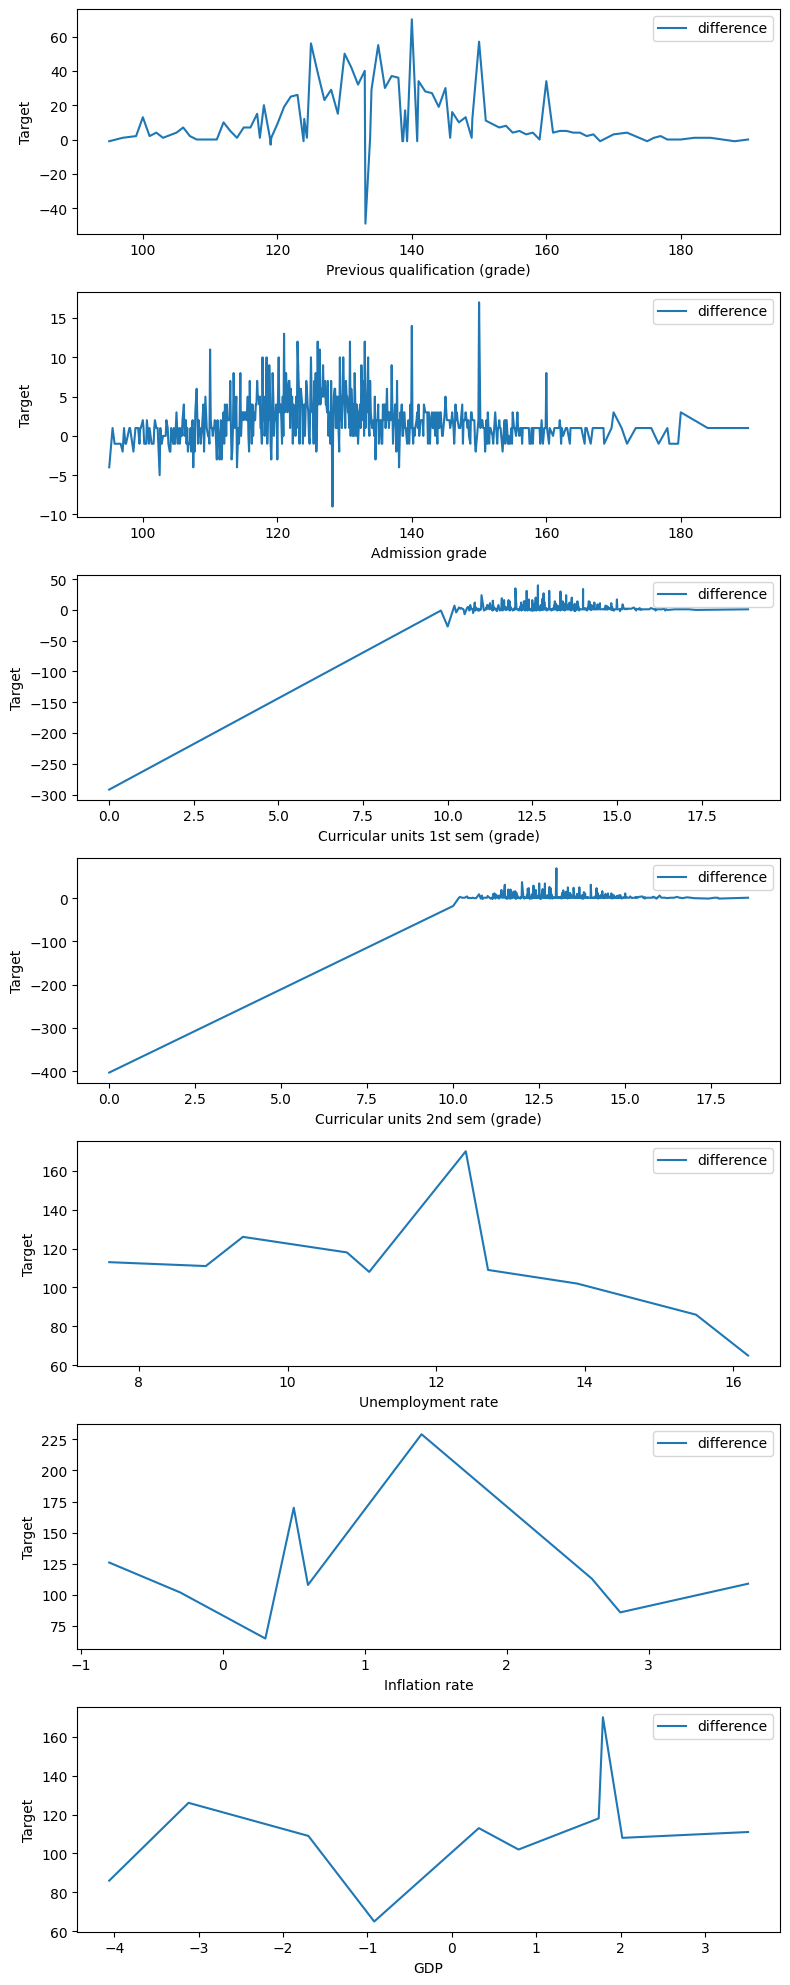

In [ ]:
students_discretizado_3 = X_train.copy()
students_discretizado_validacion_3 = X_val.copy()

fig, axes = plt.subplots(nrows=len(atributos_a_discretizar), ncols=1, figsize=(8, 20))

for i, ax in enumerate(axes):
  atributo = atributos_a_discretizar[i]
  students_discretizado_3.sort_values(atributo, inplace=True)
  x_column = students_discretizado_3[atributo]
  y_column = students_discretizado_3['Target']
  grouped = students_discretizado_3.groupby(atributo)['Target'].value_counts().unstack(fill_value=0)
  grouped['difference'] = grouped[1] - grouped[0]
  grouped['difference'].plot(kind='line', ax=ax)
  ax.set_xlabel(atributo)
  ax.set_ylabel('Target')
  ax.legend()

plt.tight_layout()

plt.show()

In [ ]:
def discretizar_est_3(df):
  df.loc[(df['Previous qualification (grade)'] < 120), 'Previous qualification (grade)'] = 0
  df.loc[(120 <= df['Previous qualification (grade)']) & (df['Previous qualification (grade)'] < 145), 'Previous qualification (grade)'] = 1
  df.loc[(145 <= df['Previous qualification (grade)']), 'Previous qualification (grade)'] = 2
  df.loc[(df['Admission grade'] < 115), 'Admission grade'] = 0
  df.loc[(115 <= df['Admission grade']) & (df['Admission grade'] < 135), 'Admission grade'] = 1
  df.loc[(135 <= df['Admission grade']), 'Admission grade'] = 2
  df.loc[(df['Curricular units 1st sem (grade)'] <= 10), 'Curricular units 1st sem (grade)'] = 0
  df.loc[(10 < df['Curricular units 1st sem (grade)']), 'Curricular units 1st sem (grade)'] = 1
  df.loc[(df['Curricular units 2nd sem (grade)'] < 10), 'Curricular units 2nd sem (grade)'] = 0
  df.loc[(10 <= df['Curricular units 2nd sem (grade)']), 'Curricular units 2nd sem (grade)'] = 1

for df in [students_discretizado_3, students_discretizado_validacion_3]:
  discretizar_est_3(df)

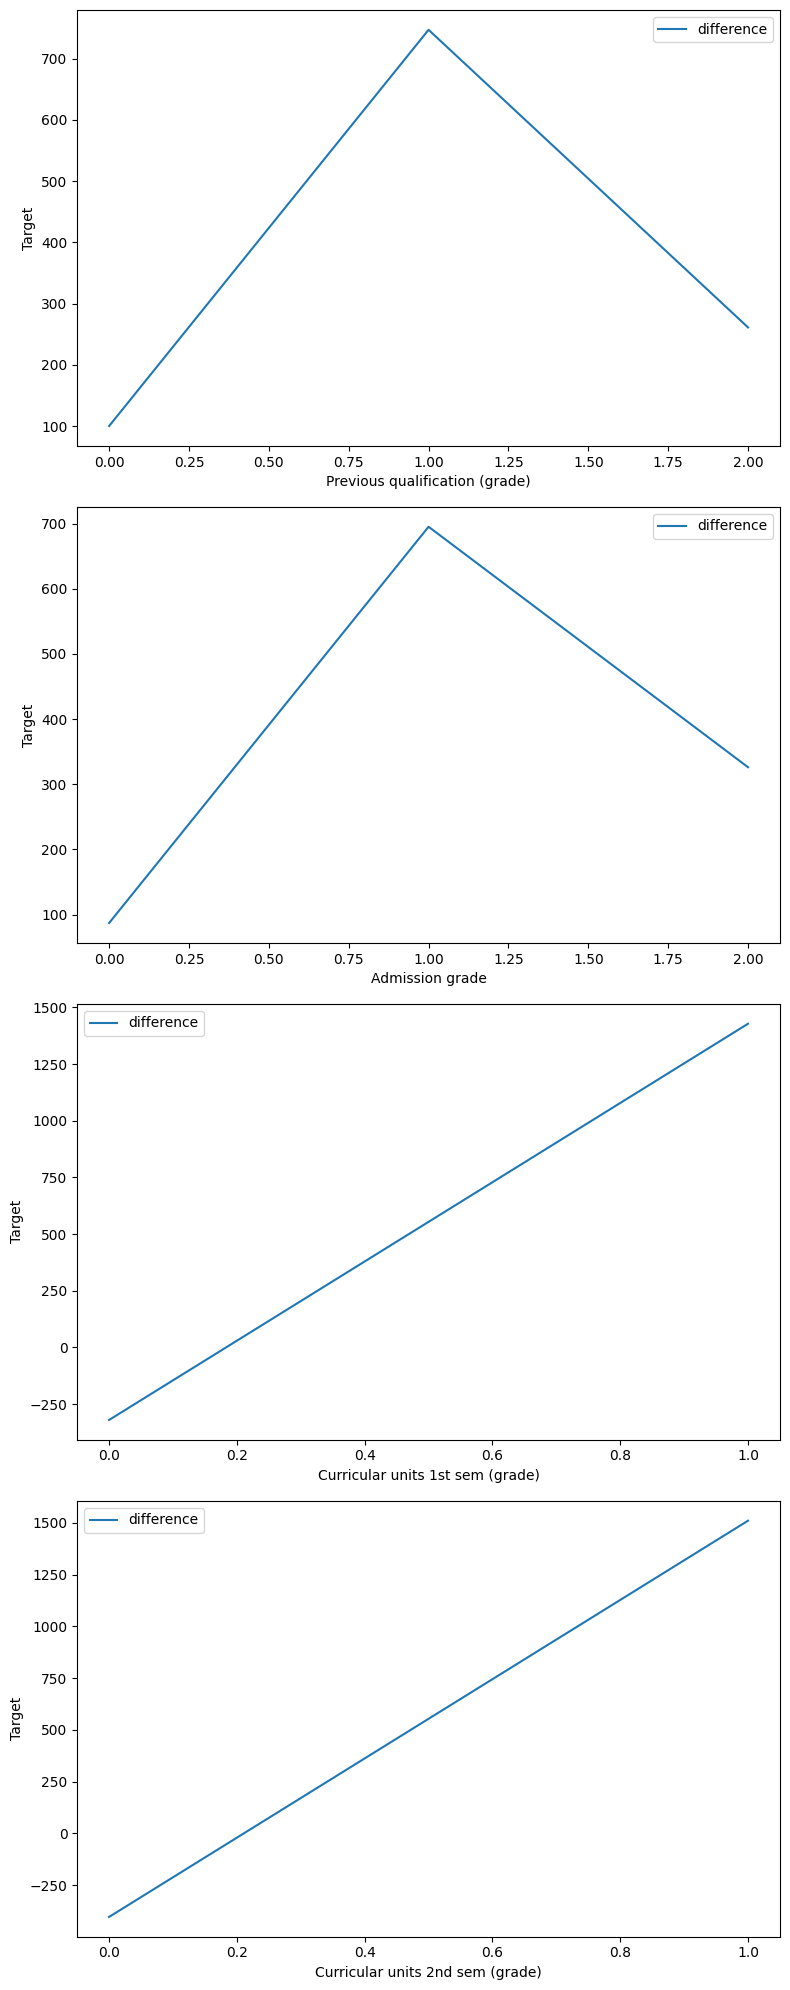

In [ ]:
atributos_a_discretizar = ['Previous qualification (grade)', 'Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']
students_discretizado_3.drop(columns=['Unemployment rate', 'Inflation rate', 'GDP'], inplace=True)
students_discretizado_validacion_3.drop(columns=['Unemployment rate', 'Inflation rate', 'GDP'], inplace=True)

fig, axes = plt.subplots(nrows=len(atributos_a_discretizar), ncols=1, figsize=(8, 20))

for i, ax in enumerate(axes):
  atributo = atributos_a_discretizar[i]
  students_discretizado_3.sort_values(atributo, inplace=True)
  x_column = students_discretizado_3[atributo]
  y_column = students_discretizado_3['Target']
  grouped = students_discretizado_3.groupby(atributo)['Target'].value_counts().unstack(fill_value=0)
  grouped['difference'] = grouped[1] - grouped[0]

  grouped['difference'].plot(kind='line', ax=ax)

  ax.set_xlabel(atributo)
  ax.set_ylabel('Target')
  ax.legend()

plt.tight_layout()

plt.show()

####Preprocesamiento de variables categóricas

In [ ]:
def preprocesamiento_variables_categoricas(df):
  #Defino los grupos de cada atributo para la recategorización
  #Father's occupation
  Father_ocu_1 = [1,2,112,121,122,123,124,125,131,132,135]
  Father_ocu_2 = [3,4,141,143,144,151,152,153,161,163,171,172,174,175,181,182,183,193,194,195]
  Father_ocu_3 = [0,5,6,7,8,9,10,90,99,101,102,103,114,134,154,192]
  #Mother's occupation
  Mother_ocu_1 = [1,2,122,123,125,131,132]
  Mother_ocu_2 = [3,4,134,141,143,144,151,152,153,171,173]
  Mother_ocu_3 = [0,5,6,7,8,9,10,90,99,175,191,192,193,194]
  #Father's qualification
  Father_qua_1 = [11,14,19,26,29,30,34,35,36,37,38]
  Father_qua_2 = [1,9,10,12,13,18,20,22,25,27,31,33,39]
  Father_qua_3 = [2,3,4,5,6,40,41,42,43,44]
  #Mother's qualification
  Mother_qua_1 = [11,14,19,26,29,30,34,35,36,37,38]
  Mother_qua_2 = [1,9,10,12,18,22,27,39]
  Mother_qua_3 = [2,3,4,5,6,40,41,42,43,44]
  #Nationality
  Nationality_1 = [1,2,6,11,13,14,17,32,62,100,103,105]
  Nationality_2 = [21,22,24,25,26]
  Nationality_3 = [41,101,108,109]

  #Re-categorizo
  df.loc[df['Nacionality'].isin(Nationality_1), 'Nacionality'] = 0
  df.loc[df['Nacionality'].isin(Nationality_2), 'Nacionality'] = 1
  df.loc[df['Nacionality'].isin(Nationality_3), 'Nacionality'] = 2
  df.loc[df["Mother's qualification"].isin(Mother_qua_1), "Mother's qualification"] = 0
  df.loc[df["Mother's qualification"].isin(Mother_qua_2), "Mother's qualification"] = 1
  df.loc[df["Mother's qualification"].isin(Mother_qua_3), "Mother's qualification"] = 2
  df.loc[df["Father's qualification"].isin(Father_qua_1), "Father's qualification"] = 0
  df.loc[df["Father's qualification"].isin(Father_qua_2), "Father's qualification"] = 1
  df.loc[df["Father's qualification"].isin(Father_qua_3), "Father's qualification"] = 2
  df.loc[df["Mother's occupation"].isin(Mother_ocu_1), "Mother's occupation"] = 0
  df.loc[df["Mother's occupation"].isin(Mother_ocu_2), "Mother's occupation"] = 1
  df.loc[df["Mother's occupation"].isin(Mother_ocu_3), "Mother's occupation"] = 2
  df.loc[df["Father's occupation"].isin(Father_ocu_1), "Father's occupation"] = 0
  df.loc[df["Father's occupation"].isin(Father_ocu_2), "Father's occupation"] = 1
  df.loc[df["Father's occupation"].isin(Father_ocu_3), "Father's occupation"] = 2
  return df

###Generación del modelo

####Función de entropía

In [ ]:
def get_entropia(columna):
  ocurrencia_1, ocurrencia_0 = columna.value_counts()
  observaciones = len(columna)
  p1 = ocurrencia_1/observaciones
  p0 = ocurrencia_0/observaciones
  return - p1 * np.log2(p1) - p0 * np.log2(p0)

####Cálculo de ganancias

In [ ]:
def max_gain(df, columna_target, columnas):

  ganancias_por_atributo = {}
  entropia = get_entropia(df[columna_target])
  observaciones = len(df)
  for column in columnas:
    if column not in ['Target', 'Target_modificado']:
      ocurrencia_por_target = df.groupby(column)[columna_target].value_counts().unstack(fill_value=0)
      observaciones_por_valor = ocurrencia_por_target.sum(axis=1)
      ocurrencia_por_target['Total'] = observaciones_por_valor
      ocurrencia_1 = ocurrencia_por_target[1.0]
      ocurrencia_0 = ocurrencia_por_target[0.0]
      p1 = ocurrencia_1/observaciones_por_valor
      p0 = ocurrencia_0/observaciones_por_valor
      entropia_por_valor = - p1 * np.log2(np.where(p1 == 0, 1, p1)) - p0 * np.log2(np.where(p0 == 0, 1, p0))
      ocurrencia_por_target['Ganancia_por_valor'] = observaciones_por_valor/observaciones * entropia_por_valor
      ganancias_por_atributo[column] = entropia - ocurrencia_por_target['Ganancia_por_valor'].sum()
      max_gain_atributo = max(ganancias_por_atributo, key=ganancias_por_atributo.get)
  return max_gain_atributo, ganancias_por_atributo[max_gain_atributo]

#### Definición del árbol

In [ ]:
def crear_sub_tree(atributo_max_gain, datos_entrenamiento, atributo_target, posibles_target, min_samples_split, gain_es_menor_min):
    posibles_valores_count_dict = datos_entrenamiento[atributo_max_gain].value_counts(sort=False) # diccionario que guarda la ocurrencia de cada posible valor
    tree = {}
    for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
        datos_filtrados = datos_entrenamiento[datos_entrenamiento[atributo_max_gain] == posible_valor] # dataset con atributo = posible_valor
        es_hoja = False # identifica si se crea una hoja o no
        datos_por_target = {}
        for target in posibles_target:
            cantidad_datos_por_target = datos_filtrados[datos_filtrados[atributo_target] == target].shape[0] # cuenta cuantos datos hay con target 1.0 o 0.0
            datos_por_target[target] = cantidad_datos_por_target
        max_target = max(datos_por_target, key=datos_por_target.get)
        if datos_por_target[max_target] == ocurrencia or len(datos_entrenamiento) <= min_samples_split or gain_es_menor_min:
            tree[posible_valor] = max_target # se agrega nueva hoja
            datos_entrenamiento = datos_entrenamiento[datos_entrenamiento[atributo_max_gain] != posible_valor] # se remueven filas con ese valor de atributo
            es_hoja = True
        if not es_hoja:
            tree[posible_valor] = "?" # como posible_valor no es una hoja, debe continuarse creando el subtree, para esto se marca con ?
    return tree, datos_entrenamiento

def crear_tree(root, atributo_previo, datos_entrenamiento, atributo_target, posibles_target, min_samples_split, min_split_gain):

    if datos_entrenamiento.shape[0] != 0: # Se chequea que el dataset tenga datos
        atributo_max_gain, valor_gain = max_gain(datos_entrenamiento, atributo_target, datos_entrenamiento.columns) # Se obtiene el atributo con mayor gain
        gain_es_menor_min = valor_gain < min_split_gain
        tree, datos_entrenamiento = crear_sub_tree(atributo_max_gain, datos_entrenamiento, atributo_target, posibles_target, min_samples_split, gain_es_menor_min) # Se obtiene el subarbol
        next_root = None
        if atributo_previo != None: # Se agrega un nodo intermedio
            root[atributo_previo] = dict()
            root[atributo_previo][atributo_max_gain] = tree
            next_root = root[atributo_previo][atributo_max_gain]
        else: # Se agrega el nodo raíz
            root[atributo_max_gain] = tree
            next_root = root[atributo_max_gain]
        for node, branch in list(next_root.items()): # se itera sobre la rama
            if branch == "?": # Si no es una hoja
                sub_datos_entrenamiento = datos_entrenamiento[datos_entrenamiento[atributo_max_gain] == node] # se filtra dataset con las filas que tengan el valor del nodo
                crear_tree(next_root, node, sub_datos_entrenamiento, atributo_target, posibles_target, min_samples_split, min_split_gain) # se llama nuevamente al metodo con subarbol y datos filtrados

def id3(datos_entrenamiento, atributo_target, min_samples_split, min_split_gain):
    datos_entrenamiento_copia = datos_entrenamiento.copy()
    tree = {}
    posibles_target = datos_entrenamiento_copia[atributo_target].unique()
    crear_tree(tree, None, datos_entrenamiento_copia, atributo_target, posibles_target, min_samples_split, min_split_gain)
    return tree

####Función de predicción

In [ ]:
def predecir(tree, row):

    if not isinstance(tree, dict): # si estoy en una hoja
        return tree # devuelve el valor de la hoja
    else:
        atributo_raiz = next(iter(tree)) # se obtiene el atributo principal del arbol o subarbol
        valor_atributo = row[atributo_raiz] # se obtiene el valor de ese atributo para la instancia 'row' a evaluar
        if valor_atributo in tree[atributo_raiz]: # se chequea si el valor está dentro del subarbol
            return predecir(tree[atributo_raiz][valor_atributo], row) # si está, se vuelve a llamar al método en busca del valor de la hoja
        else:
            print(atributo_raiz, valor_atributo)
            return tree[atributo_raiz]['default']

###Pruebas

####Generación de árboles con datasets students_discretizado_1, students_discretizado_2 y students_discretizado_3

In [ ]:
min_samples_split = 1
min_split_gain = 0.1
tree_discretizado_1 = id3(students_discretizado_1, 'Target', min_samples_split, min_split_gain)
tree_discretizado_2 = id3(students_discretizado_2, 'Target', min_samples_split, min_split_gain)
tree_discretizado_3 = id3(students_discretizado_3, 'Target', min_samples_split, min_split_gain)

<ipython-input-78-500c8b7e1c17>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-78-500c8b7e1c17>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-78-500c8b7e1c17>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-78-500c8b7e1c17>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-78-500c8b7e1c17>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, 

####Predicciones generadas

In [ ]:
y_predicted_1 = []
for index, row in students_discretizado_validacion_1.iterrows():
  y_predicted_1.append(predecir(tree_discretizado_1, row))
y_predicted_1 = pd.Series(y_predicted_1)

y_predicted_2 = []
for index, row in students_discretizado_validacion_2.iterrows():
  y_predicted_2.append(predecir(tree_discretizado_2, row))
y_predicted_2 = pd.Series(y_predicted_2)

y_predicted_3 = []
for index, row in students_discretizado_validacion_3.iterrows():
  y_predicted_3.append(predecir(tree_discretizado_3, row))
y_predicted_3 = pd.Series(y_predicted_3)


In [ ]:
print(len(y_predicted_1))
print(y_predicted_1.value_counts())
print(len(y_predicted_2))
print(y_predicted_2.value_counts())
print(len(y_predicted_3))
print(y_predicted_3.value_counts())

664
1.0    492
0.0    172
dtype: int64
664
1.0    490
0.0    174
dtype: int64
664
1.0    432
0.0    232
dtype: int64


###Evaluaciones

####Función para generar matriz de confusión

In [ ]:
def mostrar_matriz_confusion(matriz_confusion):

  # Calcula los porcentajes dividiendo cada valor en la matriz de confusión por el total de la fila correspondiente
  matriz_confusion_porcentaje = matriz_confusion.astype('float') / matriz_confusion.sum(axis=1)[:, np.newaxis]

  plt.imshow(matriz_confusion_porcentaje, cmap='Purples')

  # Configura el formato de los valores de la matriz como porcentajes
  fmt = '.2f'
  thresh = matriz_confusion_porcentaje.max() / 2.
  for i in range(matriz_confusion_porcentaje.shape[0]):
    for j in range(matriz_confusion_porcentaje.shape[1]):
        plt.text(j, i, format(matriz_confusion_porcentaje[i, j], fmt), ha="center", va="center", color="white" if matriz_confusion_porcentaje[i, j] > thresh else "black")

  # Etiquetas
  etiquetas = ['Dropout', 'Enrolled or Graduate']

  # Establece los ticks personalizados y las etiquetas para los ejes x e y
  plt.xticks(np.arange(len(etiquetas)), etiquetas)
  plt.yticks(np.arange(len(etiquetas)), etiquetas)


  plt.title('Matriz de Confusión')
  plt.xlabel('Etiqueta Predicha')
  plt.ylabel('Etiqueta Real')

  plt.colorbar()
  plt.show()

####Función de evaluación

In [ ]:
def measure_performance(y_predicted, y, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):

    if show_accuracy:
        print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y,y_predicted)),"\n")

    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y,y_predicted),"\n")

    if show_confusion_matrix:
        print ("Confusion matrix")
        print (metrics.confusion_matrix(y,y_predicted),"\n")
        mostrar_matriz_confusion(metrics.confusion_matrix(y,y_predicted))

####Evaluaciones

#####Evaluación de las 3 discretizaciones realizadas:

Mediante esto se puede comprobar que la estrategia de discretización 2 arroja mejores resultados (accuracy de %82,4). Se utilizará la misma para el resto del análisis.

---------------------------------------------------------
Análisis con estrategia de discretización 1
Accuracy:0.794 

Classification report
              precision    recall  f1-score   support

         0.0       0.72      0.58      0.64       213
         1.0       0.82      0.89      0.85       451

    accuracy                           0.79       664
   macro avg       0.77      0.74      0.75       664
weighted avg       0.79      0.79      0.79       664
 

Confusion matrix
[[124  89]
 [ 48 403]] 



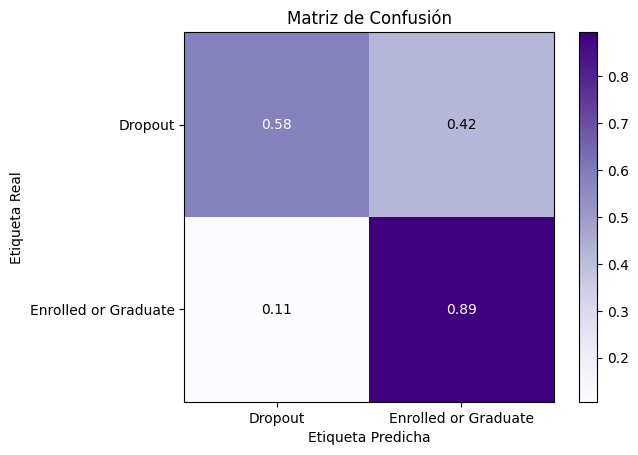


---------------------------------------------------------
Análisis con estrategia de discretización 2
Accuracy:0.824 

Classification report
              precision    recall  f1-score   support

         0.0       0.78      0.63      0.70       213
         1.0       0.84      0.91      0.88       451

    accuracy                           0.82       664
   macro avg       0.81      0.77      0.79       664
weighted avg       0.82      0.82      0.82       664
 

Confusion matrix
[[135  78]
 [ 39 412]] 



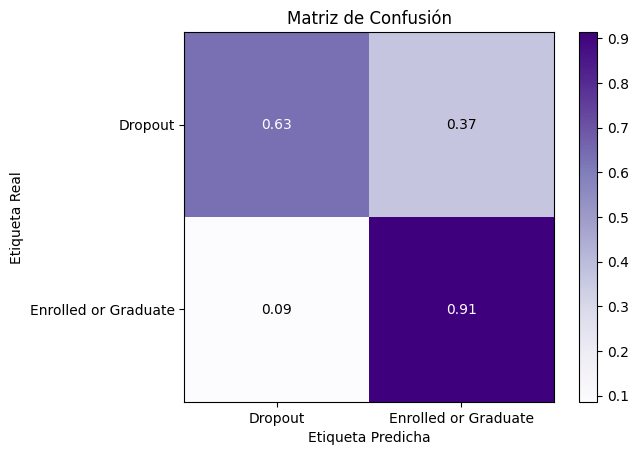


---------------------------------------------------------
Análisis con estrategia de discretización 3
Accuracy:0.794 

Classification report
              precision    recall  f1-score   support

         0.0       0.66      0.72      0.69       213
         1.0       0.86      0.83      0.84       451

    accuracy                           0.79       664
   macro avg       0.76      0.78      0.77       664
weighted avg       0.80      0.79      0.80       664
 

Confusion matrix
[[154  59]
 [ 78 373]] 



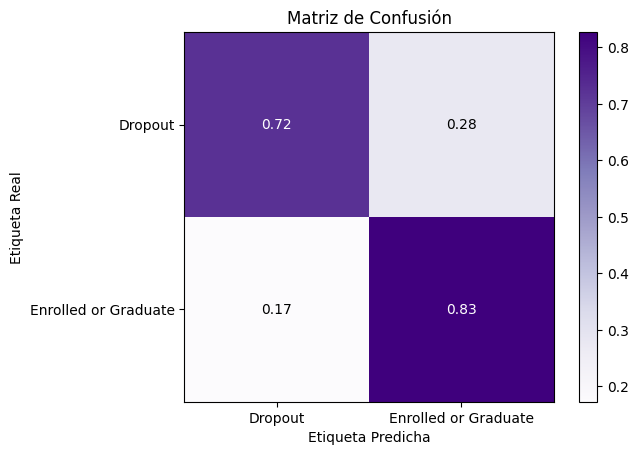

In [ ]:
print('---------------------------------------------------------')
print('Análisis con estrategia de discretización 1')
measure_performance(y_predicted_1, y_val)
print('')
print('---------------------------------------------------------')
print('Análisis con estrategia de discretización 2')
measure_performance(y_predicted_2, y_val)
print('')
print('---------------------------------------------------------')
print('Análisis con estrategia de discretización 3')
measure_performance(y_predicted_3, y_val)

#####Evaluación agrupando atributos por continente y tipo de ocupación y calificación de padre y madre:


In [ ]:
students_categorias_agrupadas = preprocesamiento_variables_categoricas(students_discretizado_2.copy())
students_categorias_agrupadas_validacion = preprocesamiento_variables_categoricas(students_discretizado_validacion_2.copy())

tree_categorias_agrupadas = id3(students_categorias_agrupadas, 'Target', min_samples_split, min_split_gain)

<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_va

In [ ]:
y_predicted_categortias_agrupadas = []
for index, row in students_categorias_agrupadas_validacion.iterrows():
  y_predicted_categortias_agrupadas.append(predecir(tree_categorias_agrupadas, row))
y_predicted_categortias_agrupadas = pd.Series(y_predicted_categortias_agrupadas)
print(len(y_predicted_categortias_agrupadas))
print(y_predicted_categortias_agrupadas.value_counts())

664
1.0    501
0.0    163
dtype: int64


---------------------------------------------------------
Análisis con estrategia de discretización 2 y categorías agrupadas
Accuracy:0.831 

Classification report
              precision    recall  f1-score   support

         0.0       0.81      0.62      0.70       213
         1.0       0.84      0.93      0.88       451

    accuracy                           0.83       664
   macro avg       0.82      0.78      0.79       664
weighted avg       0.83      0.83      0.82       664
 

Confusion matrix
[[132  81]
 [ 31 420]] 



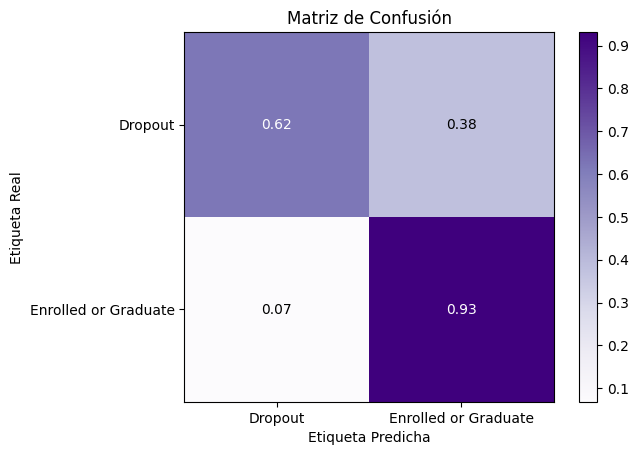

In [ ]:
print('---------------------------------------------------------')
print('Análisis con estrategia de discretización 2 y categorías agrupadas')
measure_performance(y_predicted_categortias_agrupadas, y_val)

####Pasamos a evaluar el algoritmo con distintos valores de los hiperparámetros

<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_va

Arbol 1
Accuracy:0.809 

Classification report
              precision    recall  f1-score   support

         0.0       0.75      0.61      0.67       213
         1.0       0.83      0.90      0.87       451

    accuracy                           0.81       664
   macro avg       0.79      0.76      0.77       664
weighted avg       0.80      0.81      0.80       664
 

Confusion matrix
[[130  83]
 [ 44 407]] 



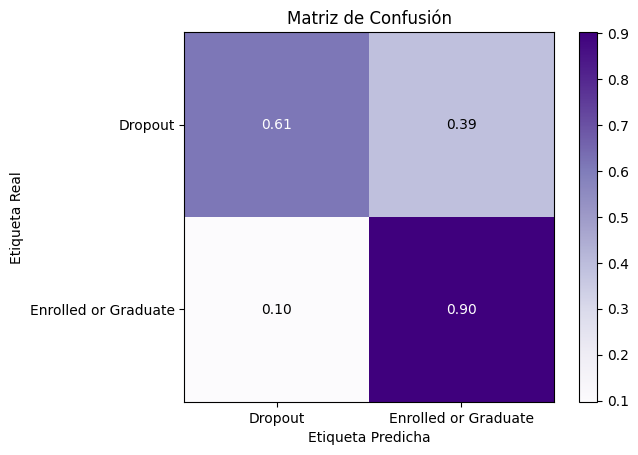

<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_va

Arbol 2
Accuracy:0.809 

Classification report
              precision    recall  f1-score   support

         0.0       0.75      0.61      0.67       213
         1.0       0.83      0.90      0.87       451

    accuracy                           0.81       664
   macro avg       0.79      0.76      0.77       664
weighted avg       0.80      0.81      0.80       664
 

Confusion matrix
[[130  83]
 [ 44 407]] 



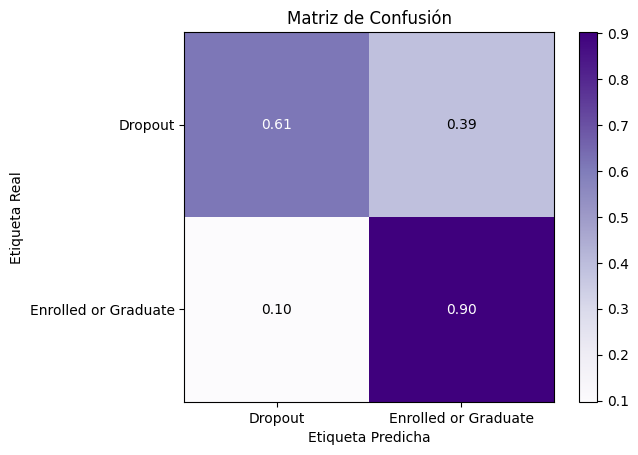

<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_va

Arbol 3
Accuracy:0.819 

Classification report
              precision    recall  f1-score   support

         0.0       0.78      0.61      0.68       213
         1.0       0.83      0.92      0.87       451

    accuracy                           0.82       664
   macro avg       0.81      0.76      0.78       664
weighted avg       0.82      0.82      0.81       664
 

Confusion matrix
[[130  83]
 [ 37 414]] 



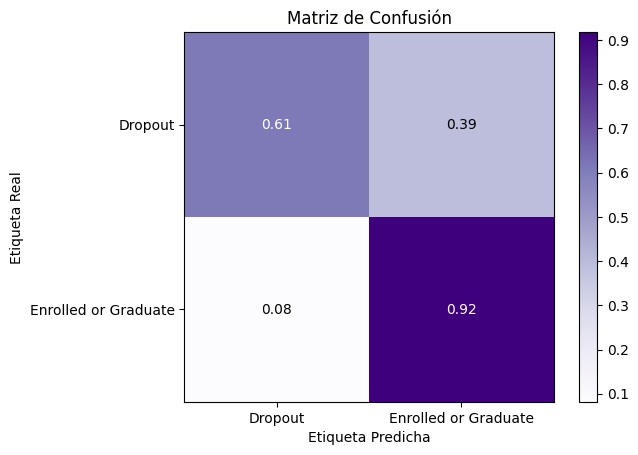

<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_va

Arbol 4
Accuracy:0.825 

Classification report
              precision    recall  f1-score   support

         0.0       0.81      0.60      0.69       213
         1.0       0.83      0.93      0.88       451

    accuracy                           0.83       664
   macro avg       0.82      0.76      0.78       664
weighted avg       0.82      0.83      0.82       664
 

Confusion matrix
[[127  86]
 [ 30 421]] 



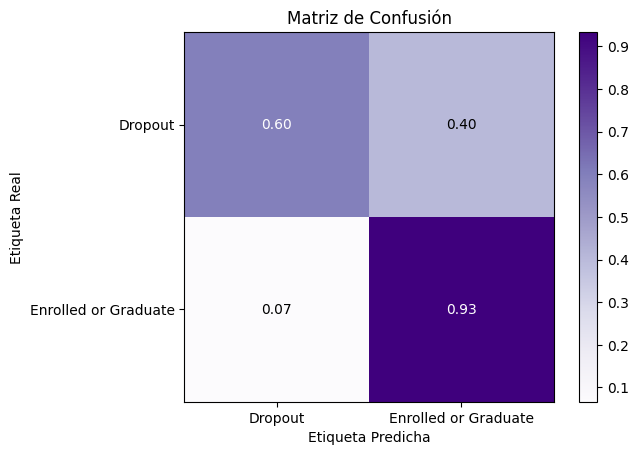

<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():


Arbol 5
Accuracy:0.831 

Classification report
              precision    recall  f1-score   support

         0.0       0.77      0.68      0.72       213
         1.0       0.86      0.90      0.88       451

    accuracy                           0.83       664
   macro avg       0.81      0.79      0.80       664
weighted avg       0.83      0.83      0.83       664
 

Confusion matrix
[[144  69]
 [ 43 408]] 



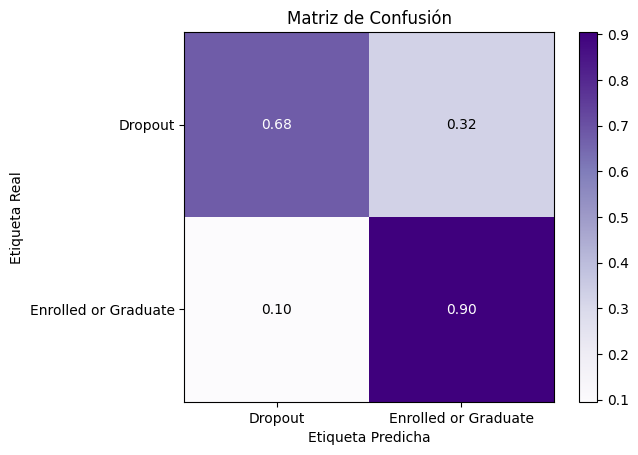

<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_va

Arbol 6
Accuracy:0.819 

Classification report
              precision    recall  f1-score   support

         0.0       0.78      0.61      0.68       213
         1.0       0.83      0.92      0.87       451

    accuracy                           0.82       664
   macro avg       0.81      0.76      0.78       664
weighted avg       0.82      0.82      0.81       664
 

Confusion matrix
[[130  83]
 [ 37 414]] 



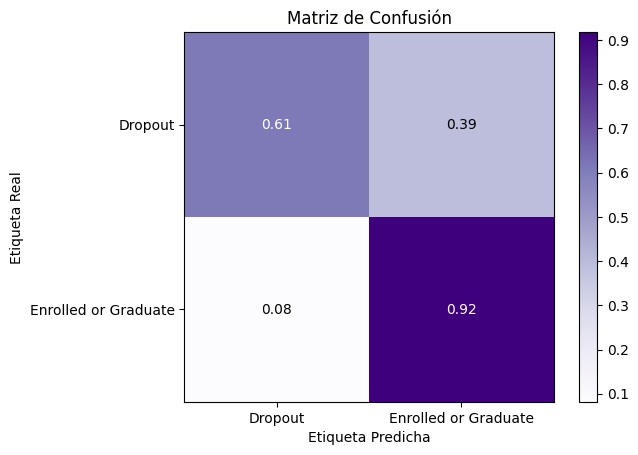

<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_va

Arbol 7
Accuracy:0.821 

Classification report
              precision    recall  f1-score   support

         0.0       0.78      0.61      0.69       213
         1.0       0.83      0.92      0.87       451

    accuracy                           0.82       664
   macro avg       0.81      0.77      0.78       664
weighted avg       0.82      0.82      0.81       664
 

Confusion matrix
[[130  83]
 [ 36 415]] 



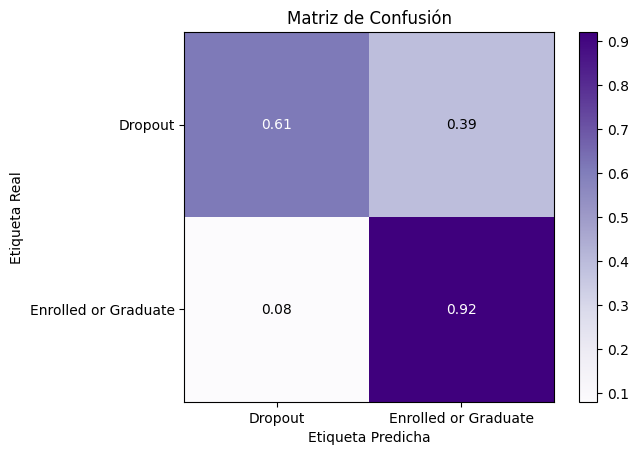

<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_va

Arbol 8
Accuracy:0.807 

Classification report
              precision    recall  f1-score   support

         0.0       0.77      0.56      0.65       213
         1.0       0.82      0.92      0.87       451

    accuracy                           0.81       664
   macro avg       0.80      0.74      0.76       664
weighted avg       0.80      0.81      0.80       664
 

Confusion matrix
[[120  93]
 [ 35 416]] 



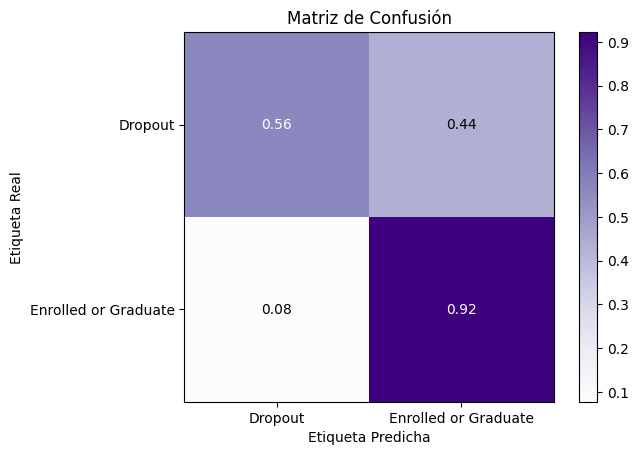

<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_va

Arbol 9
Accuracy:0.789 

Classification report
              precision    recall  f1-score   support

         0.0       0.74      0.52      0.61       213
         1.0       0.80      0.92      0.86       451

    accuracy                           0.79       664
   macro avg       0.77      0.72      0.73       664
weighted avg       0.78      0.79      0.78       664
 

Confusion matrix
[[111 102]
 [ 38 413]] 



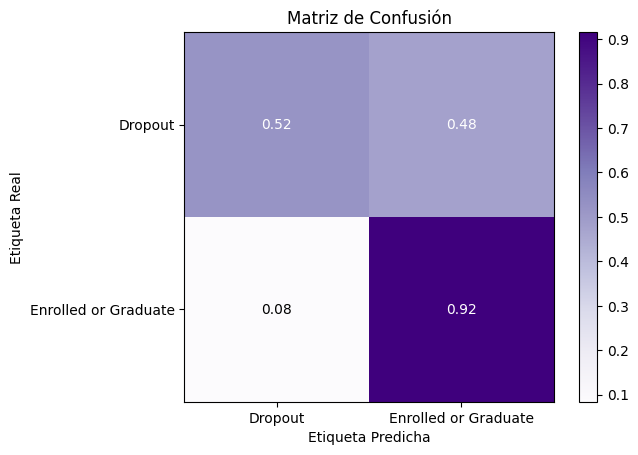

<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_va

Arbol 10
Accuracy:0.812 

Classification report
              precision    recall  f1-score   support

         0.0       0.76      0.61      0.68       213
         1.0       0.83      0.91      0.87       451

    accuracy                           0.81       664
   macro avg       0.79      0.76      0.77       664
weighted avg       0.81      0.81      0.81       664
 

Confusion matrix
[[130  83]
 [ 42 409]] 



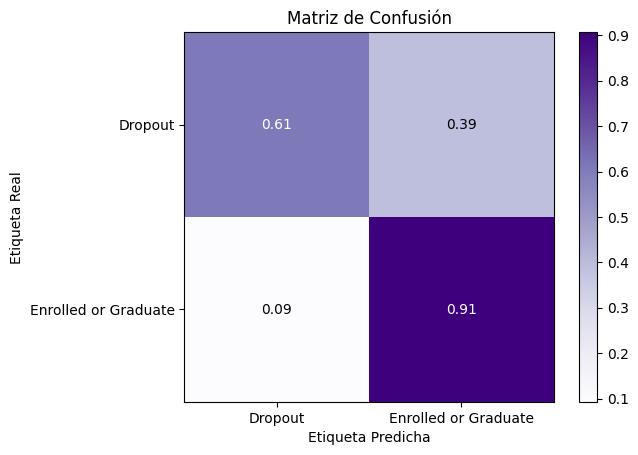

<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_va

Arbol 11
Accuracy:0.794 

Classification report
              precision    recall  f1-score   support

         0.0       0.74      0.55      0.63       213
         1.0       0.81      0.91      0.86       451

    accuracy                           0.79       664
   macro avg       0.78      0.73      0.74       664
weighted avg       0.79      0.79      0.78       664
 

Confusion matrix
[[117  96]
 [ 41 410]] 



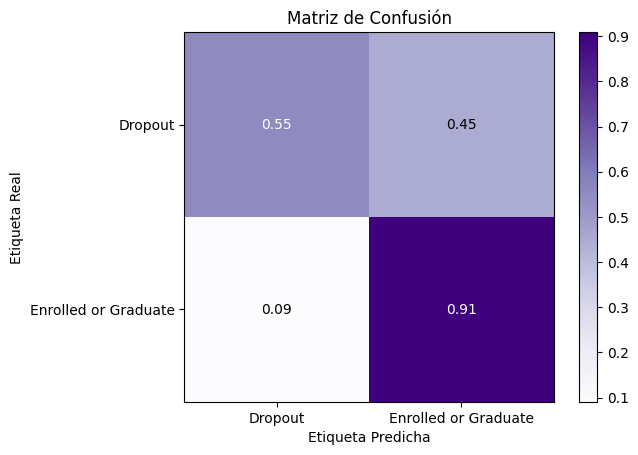

<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_va

Arbol 12
Accuracy:0.827 

Classification report
              precision    recall  f1-score   support

         0.0       0.81      0.60      0.69       213
         1.0       0.83      0.94      0.88       451

    accuracy                           0.83       664
   macro avg       0.82      0.77      0.78       664
weighted avg       0.83      0.83      0.82       664
 

Confusion matrix
[[127  86]
 [ 29 422]] 



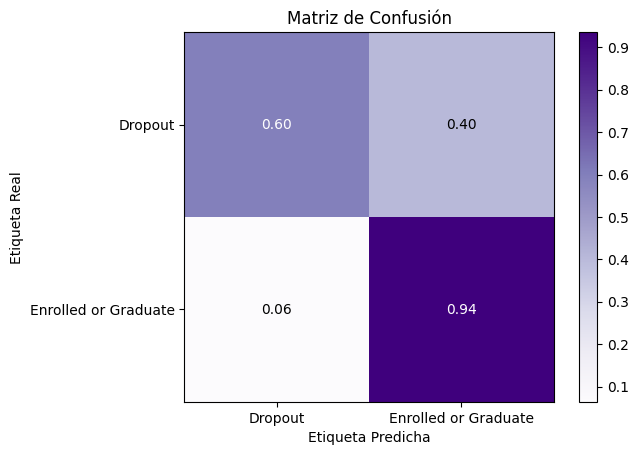

In [ ]:
#Arbol1

min_samples_split = 1
min_split_gain = 0.00001
tree = id3(students_categorias_agrupadas, 'Target', min_samples_split, min_split_gain)

y_predicted = []
for index, row in students_categorias_agrupadas_validacion.iterrows():
  y_predicted.append(predecir(tree, row))
y_predicted = pd.Series(y_predicted)
print('Arbol 1')
measure_performance(y_predicted, y_val)

#Arbol2

min_samples_split = 1
min_split_gain = 0.05
tree = id3(students_categorias_agrupadas, 'Target', min_samples_split, min_split_gain)

y_predicted = []
for index, row in students_categorias_agrupadas_validacion.iterrows():
  y_predicted.append(predecir(tree, row))
y_predicted = pd.Series(y_predicted)
print('Arbol 2')
measure_performance(y_predicted, y_val)

#Arbol3

min_samples_split = 1
min_split_gain = 0.1
tree = id3(students_categorias_agrupadas, 'Target', min_samples_split, min_split_gain)

y_predicted = []
for index, row in students_categorias_agrupadas_validacion.iterrows():
  y_predicted.append(predecir(tree, row))
y_predicted = pd.Series(y_predicted)
print('Arbol 3')
measure_performance(y_predicted, y_val)

#Arbol4

min_samples_split = 1
min_split_gain = 0.25
tree = id3(students_categorias_agrupadas, 'Target', min_samples_split, min_split_gain)

y_predicted = []
for index, row in students_categorias_agrupadas_validacion.iterrows():
  y_predicted.append(predecir(tree, row))
y_predicted = pd.Series(y_predicted)
print('Arbol 4')
measure_performance(y_predicted, y_val)

#Arbol5

min_samples_split = 1
min_split_gain = 0.9
tree = id3(students_categorias_agrupadas, 'Target', min_samples_split, min_split_gain)

y_predicted = []
for index, row in students_categorias_agrupadas_validacion.iterrows():
  y_predicted.append(predecir(tree, row))
y_predicted = pd.Series(y_predicted)
print('Arbol 5')
measure_performance(y_predicted, y_val)

#Arbol6

min_samples_split = 3
min_split_gain = 0.1
tree = id3(students_categorias_agrupadas, 'Target', min_samples_split, min_split_gain)

y_predicted = []
for index, row in students_categorias_agrupadas_validacion.iterrows():
  y_predicted.append(predecir(tree, row))
y_predicted = pd.Series(y_predicted)
print('Arbol 6')
measure_performance(y_predicted, y_val)

#Arbol7

min_samples_split = 10
min_split_gain = 0.1
tree = id3(students_categorias_agrupadas, 'Target', min_samples_split, min_split_gain)

y_predicted = []
for index, row in students_categorias_agrupadas_validacion.iterrows():
  y_predicted.append(predecir(tree, row))
y_predicted = pd.Series(y_predicted)
print('Arbol 7')
measure_performance(y_predicted, y_val)

#Arbol8

min_samples_split = 25
min_split_gain = 0.1
tree = id3(students_categorias_agrupadas, 'Target', min_samples_split, min_split_gain)

y_predicted = []
for index, row in students_categorias_agrupadas_validacion.iterrows():
  y_predicted.append(predecir(tree, row))
y_predicted = pd.Series(y_predicted)
print('Arbol 8')
measure_performance(y_predicted, y_val)

#Arbol9

min_samples_split = 100
min_split_gain = 0.1
tree = id3(students_categorias_agrupadas, 'Target', min_samples_split, min_split_gain)

y_predicted = []
for index, row in students_categorias_agrupadas_validacion.iterrows():
  y_predicted.append(predecir(tree, row))
y_predicted = pd.Series(y_predicted)
print('Arbol 9')
measure_performance(y_predicted, y_val)

#Arbol10

min_samples_split = 10
min_split_gain = 0.02
tree = id3(students_categorias_agrupadas, 'Target', min_samples_split, min_split_gain)

y_predicted = []
for index, row in students_categorias_agrupadas_validacion.iterrows():
  y_predicted.append(predecir(tree, row))
y_predicted = pd.Series(y_predicted)
print('Arbol 10')
measure_performance(y_predicted, y_val)

#Arbol11

min_samples_split = 35
min_split_gain = 0.02
tree = id3(students_categorias_agrupadas, 'Target', min_samples_split, min_split_gain)

y_predicted = []
for index, row in students_categorias_agrupadas_validacion.iterrows():
  y_predicted.append(predecir(tree, row))
y_predicted = pd.Series(y_predicted)
print('Arbol 11')
measure_performance(y_predicted, y_val)

#Arbol12

min_samples_split = 20
min_split_gain = 0.2
tree = id3(students_categorias_agrupadas, 'Target', min_samples_split, min_split_gain)

y_predicted = []
for index, row in students_categorias_agrupadas_validacion.iterrows():
  y_predicted.append(predecir(tree, row))
y_predicted = pd.Series(y_predicted)
print('Arbol 12')
measure_performance(y_predicted, y_val)



Se incluye en la siguiente tabla un resumen de los resultados donde se aprecia para cada modelo las métricas obtenidas y los hiperparámetros usados. En el caso de la precisión y el recall, el valor informado es el promedio ponderado de estos.

    Modelo  Min_split_gain  Min_sample_split  Exactitud Precisión Recall  F1-Score
    1            1          0.00001             0.80       0.78     0.74   0.75
    2            1          0.05                0.80       0.79     0.80   0.79
    3            1          0.1                 0.81       0.80     0.81   0.80
    4            1          0.25                0.83       0.83     0.83   0.82
    5            1          0.9                 0.83       0.83     0.83   0.83
    6            3          0.1                 0.81       0.80     0.81   0.80
    7            10         0.1                 0.81       0.81     0.81   0.80
    8            25         0.1                 0.81       0.80     0.81   0.80
    9           100         0.1                 0.80       0.79     0.80   0.79
    10           10         0.02                0.80       0.79     0.80   0.79
    11           35         0.02                0.80       0.79     0.80   0.79
    12           20         0.2                 0.83       0.83     0.83   0.83

            
            
 Como puede verse, el modelo predice mejor con el parámetro Min_sample_split mayor a 0.2. Se hace alguna prueba más en busca de mejores resultados:


<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_va

Arbol 13
Accuracy:0.827 

Classification report
              precision    recall  f1-score   support

         0.0       0.81      0.60      0.69       213
         1.0       0.83      0.94      0.88       451

    accuracy                           0.83       664
   macro avg       0.82      0.77      0.78       664
weighted avg       0.83      0.83      0.82       664
 

Confusion matrix
[[127  86]
 [ 29 422]] 



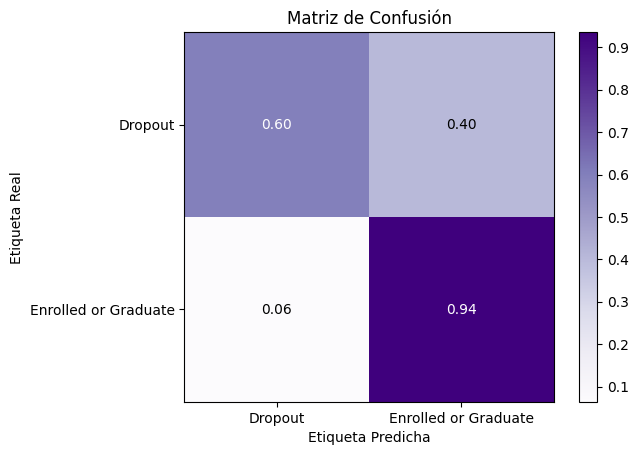

<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_va

Arbol 14
Accuracy:0.827 

Classification report
              precision    recall  f1-score   support

         0.0       0.81      0.60      0.69       213
         1.0       0.83      0.94      0.88       451

    accuracy                           0.83       664
   macro avg       0.82      0.77      0.78       664
weighted avg       0.83      0.83      0.82       664
 

Confusion matrix
[[127  86]
 [ 29 422]] 



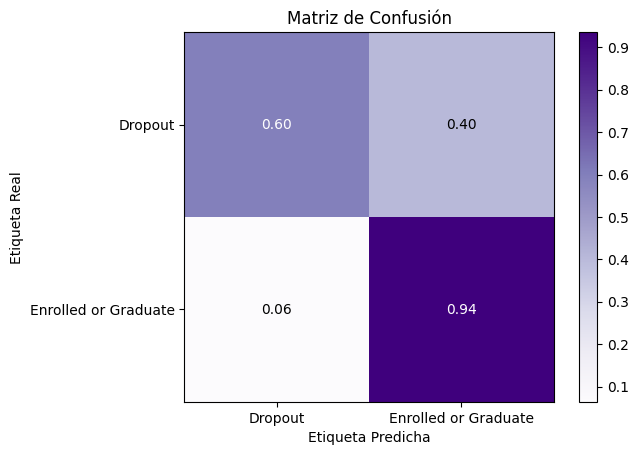

<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_va

Arbol 15
Accuracy:0.825 

Classification report
              precision    recall  f1-score   support

         0.0       0.81      0.60      0.69       213
         1.0       0.83      0.93      0.88       451

    accuracy                           0.83       664
   macro avg       0.82      0.77      0.78       664
weighted avg       0.82      0.83      0.82       664
 

Confusion matrix
[[128  85]
 [ 31 420]] 



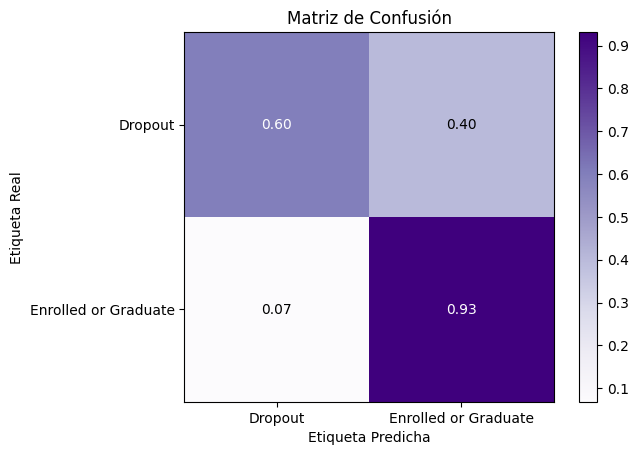

<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_valor, ocurrencia in posibles_valores_count_dict.iteritems():
<ipython-input-125-d724ebb607dc>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for posible_va

Arbol 16
Accuracy:0.831 

Classification report
              precision    recall  f1-score   support

         0.0       0.81      0.62      0.70       213
         1.0       0.84      0.93      0.88       451

    accuracy                           0.83       664
   macro avg       0.82      0.78      0.79       664
weighted avg       0.83      0.83      0.82       664
 

Confusion matrix
[[132  81]
 [ 31 420]] 



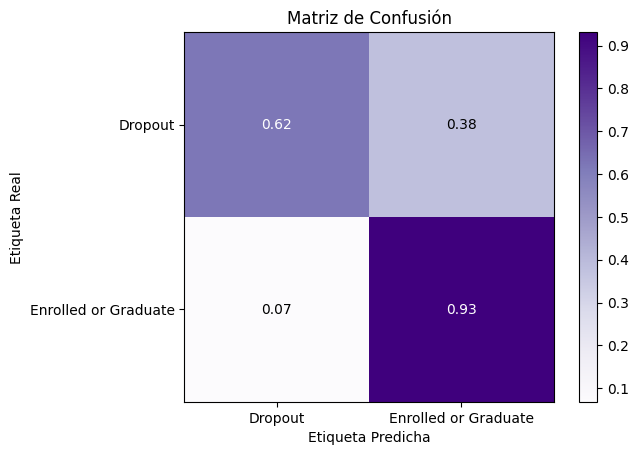

In [ ]:
#Arbol13

min_samples_split = 10
min_split_gain = 0.25
tree = id3(students_categorias_agrupadas, 'Target', min_samples_split, min_split_gain)

y_predicted = []
for index, row in students_categorias_agrupadas_validacion.iterrows():
  y_predicted.append(predecir(tree, row))
y_predicted = pd.Series(y_predicted)
print('Arbol 13')
measure_performance(y_predicted, y_val)

#Arbol14

min_samples_split = 50
min_split_gain = 0.25
tree = id3(students_categorias_agrupadas, 'Target', min_samples_split, min_split_gain)

y_predicted = []
for index, row in students_categorias_agrupadas_validacion.iterrows():
  y_predicted.append(predecir(tree, row))
y_predicted = pd.Series(y_predicted)
print('Arbol 14')
measure_performance(y_predicted, y_val)

#Arbol15

min_samples_split = 100
min_split_gain = 0.25
tree = id3(students_categorias_agrupadas, 'Target', min_samples_split, min_split_gain)

y_predicted = []
for index, row in students_categorias_agrupadas_validacion.iterrows():
  y_predicted.append(predecir(tree, row))
y_predicted = pd.Series(y_predicted)
print('Arbol 15')
measure_performance(y_predicted, y_val)

#Arbol16

min_samples_split = 300
min_split_gain = 0.25
tree = id3(students_categorias_agrupadas, 'Target', min_samples_split, min_split_gain)

y_predicted = []
for index, row in students_categorias_agrupadas_validacion.iterrows():
  y_predicted.append(predecir(tree, row))
y_predicted = pd.Series(y_predicted)
print('Arbol 16')
measure_performance(y_predicted, y_val)


####Evaluación final
Finalmente se utiliza el dataset de testing para evaluar el algoritmo creado utilizando la estrategia de discretización 2, agrupando por categorías, con parámetros min_samples_split = 20 y min_split_gain = 0.2.

Se obtiene un %81 de accuracy.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


---------------------------------------------------------
Análisis con conjunto de testeo
Accuracy:0.810 

Classification report
              precision    recall  f1-score   support

         0.0       0.78      0.57      0.66       214
         1.0       0.82      0.92      0.87       450

    accuracy                           0.81       664
   macro avg       0.80      0.75      0.76       664
weighted avg       0.81      0.81      0.80       664
 

Confusion matrix
[[122  92]
 [ 34 416]] 



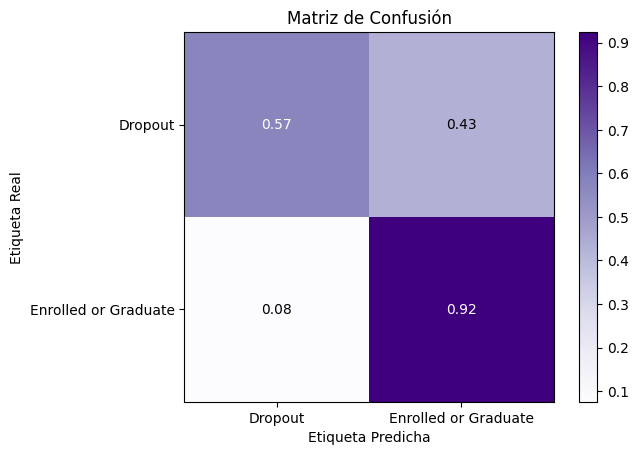

In [ ]:
students_testing_discretizado = X_test.copy()

for atributo in atributos_a_discretizar:
  cantidad_valores = len(students_testing_discretizado[atributo].unique())
  students_testing_discretizado.drop(columns=atributo, inplace=True)
  if cantidad_valores > 10:
    n_bins = cantidad_valores//10
  else:
    n_bins = 5
  students_testing_discretizado = get_dataset_discretizado(students_testing_discretizado, atributo, n_bins)

students_testing_discretizado = preprocesamiento_variables_categoricas(students_testing_discretizado.copy())

y_predicted_testing = []
for index, row in students_testing_discretizado.iterrows():
  y_predicted_testing.append(predecir(tree, row))
y_predicted_testing = pd.Series(y_predicted_testing)

print('---------------------------------------------------------')
print('Análisis con conjunto de testeo')
measure_performance(y_predicted_testing, y_test)

d) Algoritmos "Decision Tree Classifier" y "Random Forest Classifier"
Se evalúan estos algoritmos en el dataset discretizado mediante el método 2

In [ ]:
students_categorias_agrupadas = students_categorias_agrupadas.drop('Target', axis=1)
students_testing_discretizado = students_testing_discretizado.drop('Target', axis=1)

0.766566265060241
Accuracy:0.767 

Classification report
              precision    recall  f1-score   support

         0.0       0.62      0.71      0.66       214
         1.0       0.85      0.79      0.82       450

    accuracy                           0.77       664
   macro avg       0.74      0.75      0.74       664
weighted avg       0.78      0.77      0.77       664
 

Confusion matrix
[[153  61]
 [ 94 356]] 



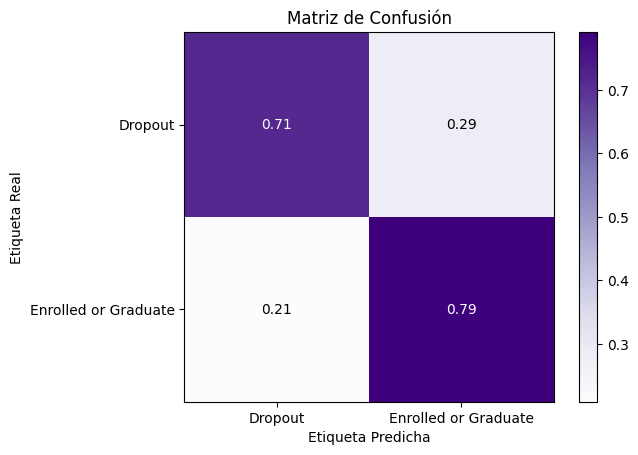

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

students_categorias_agrupadas = students_categorias_agrupadas.sort_index(axis=1)
students_testing_discretizado = students_testing_discretizado.sort_index(axis=1)

#   Decision Tree Classifier

# Creamos clasifiacador, entrenamos modelo
DT = DecisionTreeClassifier(random_state=0)
DT.fit(students_categorias_agrupadas, y_train)
#Realizamos predicciones de y_val
y_DT_Pred = DT.predict(students_testing_discretizado)

#Calculamos exactitud
accuracy = accuracy_score(y_test, y_DT_Pred)
print(accuracy)
#Ejecutamos measure_performance
measure_performance(y_DT_Pred, y_test)



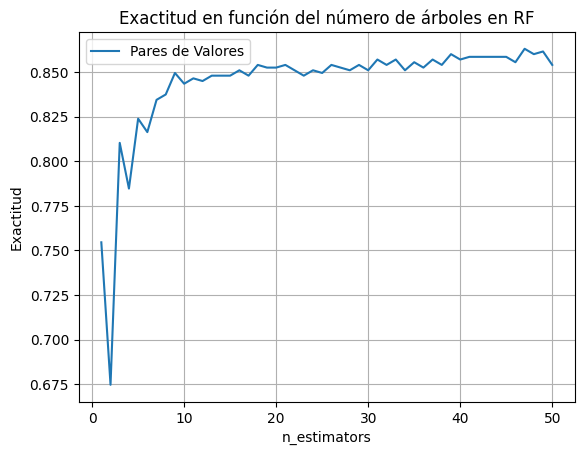

In [ ]:
#   Random Forest Classifier


# Calculamos exactitd para distintos números de árboles (n_estimators)
#Defino función de RF para probar con varios n_estimators
def RForest(i,X_train,y_train,X_val,y_val):
  RF = RandomForestClassifier(n_estimators = i,random_state=0)
  RF.fit(X_train, y_train)
  y_RF_Pred = RF.predict(X_val)
  accuracy = accuracy_score(y_val, y_RF_Pred)
  return accuracy
#Ejecuto función de RF con distintos n_estimators
accu = []
for i in range(1,51):
  aux = RForest(i,students_categorias_agrupadas,y_train,students_testing_discretizado,y_test)
  accu.append(aux)
#Gráfico
x = list(range(1, 51))
plt.plot(x, accu, label='Pares de Valores')
plt.xlabel('n_estimators')
plt.ylabel('Exactitud')
plt.title('Exactitud en función del número de árboles en RF')
plt.legend()
plt.grid(True)
plt.show()


Como se comprueba con la gráfica de exactitud en función del número de árboles considerado, a partir de 20 árboles la exactitud permanece aproximadamente constante. Se procede a analizar el efecto del número de árboles considerados en la precisión y demás métricas

Accuracy:0.852 

Classification report
              precision    recall  f1-score   support

         0.0       0.78      0.75      0.77       214
         1.0       0.88      0.90      0.89       450

    accuracy                           0.85       664
   macro avg       0.83      0.82      0.83       664
weighted avg       0.85      0.85      0.85       664
 

Confusion matrix
[[160  54]
 [ 44 406]] 



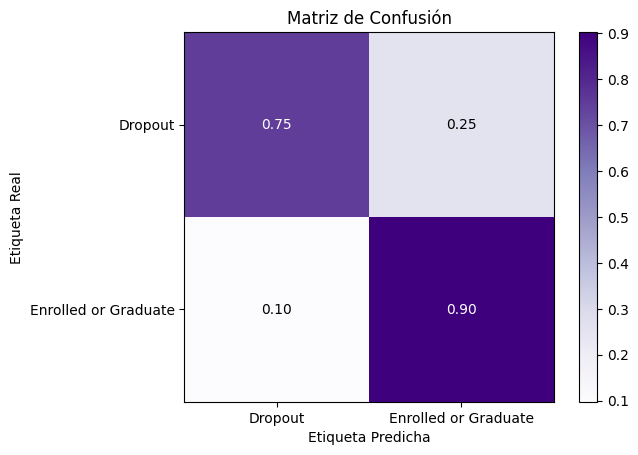

In [ ]:
#RF n_estimators = 20
#Creamos clasificador, entrenamos modelo
RF = RandomForestClassifier(n_estimators = 20,random_state=0)
RF.fit(students_categorias_agrupadas, y_train)
#Realizamos predicciones de y_val
y_RF_Pred = RF.predict(students_testing_discretizado)
#Ejecutamos measure_performance
measure_performance(y_RF_Pred, y_test)


Accuracy:0.858 

Classification report
              precision    recall  f1-score   support

         0.0       0.80      0.74      0.77       214
         1.0       0.88      0.91      0.90       450

    accuracy                           0.86       664
   macro avg       0.84      0.83      0.83       664
weighted avg       0.86      0.86      0.86       664
 

Confusion matrix
[[159  55]
 [ 39 411]] 



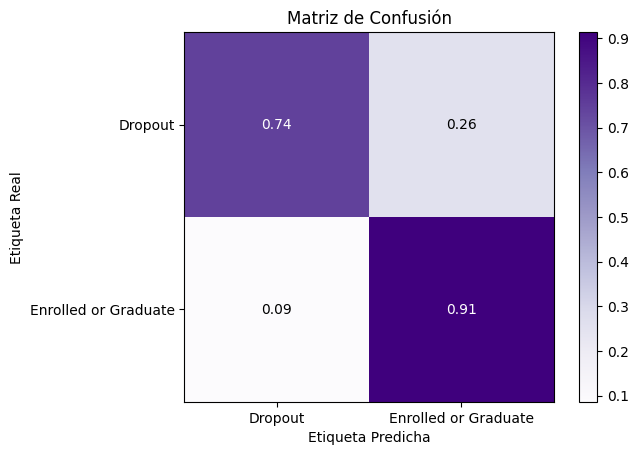

In [ ]:
#RF n_estimators = 200
#Creamos clasificador, entrenamos modelo
RF = RandomForestClassifier(n_estimators = 200,random_state=0)
RF.fit(students_categorias_agrupadas, y_train)
#Realizamos predicciones de y_val
y_RF_Pred = RF.predict(students_testing_discretizado)
#Ejecutamos measure_performance
measure_performance(y_RF_Pred, y_test)

# 5. Conclusión


Se encontró que los mejores valores de los hiperparametros usados en la ejecución del algoritmo ID3 fueron:

    Min_sample_split  =  20
    Min_split_gain    =  0.2

Con estos valores, se obtuvo una exactitud y una precisión de 0.81 y 0.81 respectivamente. Es posible seguir buscando pares de valores para estos parámetros que mejoren al modelo.
Los resultados obtenidos por ID3 estuvieron por debajo de los obtenidos al resolver el problema mediante el uso del algoritmo Decision Tree y por encima de Random forest. Esto no es lo esperado ya que estos últimos dos algoritmos son más complejos.
A continuación, se muestra una tabla con la exactitud y precisión del modelo sobre el set de Testeo:

			    ID3 (20, 0,2)       DT     RF
    Exactitud		0,81          0,77   0,86
    Precisión		0,81          0,78   0,86

Se observó que los resultados dependieron del método usado para discretización de los datos y que de usarse correctamente un criterio de agrupación para variables categóricas es posible mejorar al modelo.

#6. Anexo: clasificación usada para la recodificación




Father’s occupation:
Grupo 1: Profesionales y Técnicos Altamente Calificados
    1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers
    2 - Specialists in Intellectual and Scientific Activities
    112 - Directors of administrative and commercial services
    121 - Specialists in the physical sciences, mathematics, engineering and related techniques
    122 - Health professionals
    123 - teachers
    124 - Specialists in finance, accounting, administrative organization, public and commercial relations
    125 - Specialists in information and communication technologies (ICT)
    131 - Intermediate level science and engineering technicians and professions
    132 - Technicians and professionals, of intermediate level of health
    135 - Information and communication technology technicians
Grupo 2: Trabajadores de Oficina, Servicios y Operativos
    3 - Intermediate Level Technicians and Professions
    4 - Administrative staff
    141 - Office workers, secretaries in general and data processing operators
    143 - Data, accounting, statistical, financial services and registry-related operators
    144 - Other administrative support staff
    151 - personal service workers
    152 - sellers
    153 - Personal care workers and the like
    161 - Market-oriented farmers and skilled agricultural and animal production workers
    163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence
    171 - Skilled construction workers and the like, except electricians
    172 - Skilled workers in metallurgy, metalworking and similar
    174 - Skilled workers in electricity and electronics
    175 - Workers in food processing, woodworking, clothing and other industries and crafts
    181 - Fixed plant and machine operators
    182 - assembly workers
    183 - Vehicle drivers and mobile equipment operators
    192 - Unskilled workers in agriculture, animal production, fisheries and forestry
    193 - Unskilled workers in extractive industry, construction, manufacturing and transport
    194 - Meal preparation assistants
    195 - Street vendors (except food) and street service providers
Grupo 3: Trabajadores Agrícolas, Operativos y de Soporte
    0 - Student
    5 - Personal Services, Security and Safety Workers and Sellers
    6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry
    7 - Skilled Workers in Industry, Construction and Craftsmen
    8 - Installation and Machine Operators and Assembly Workers
    9 - Unskilled Workers
    10 - Armed Forces Professions
    90 - Other Situation
    99 - (blank)
    101 - Armed Forces Officers
    102 - Armed Forces Sergeants
    103 - Other Armed Forces personnel
    114 - Hotel, catering, trade and other services directors
    134 - Intermediate level technicians from legal, social, sports, cultural and similar services
    154 - Protection and security services personnel

Mother’s occupation:
Grupo 1: Profesionales y Técnicos Altamente Calificados
1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers
2 - Specialists in Intellectual and Scientific Activities
122 - Health professionals
125 - Specialists in information and communication technologies (ICT)
131 - Intermediate level science and engineering technicians and professions
132 - Technicians and professionals, of intermediate level of health
Grupo 2: Trabajadores de Oficina, Servicios y Operativos
3 - Intermediate Level Technicians and Professions
4 - Administrative staff
134 - Intermediate level technicians from legal, social, sports, cultural and similar services
141 - Office workers, secretaries in general and data processing operators
143 - Data, accounting, statistical, financial services and registry-related operators
144 - Other administrative support staff
151 - personal service workers
152 - sellers
153 - Personal care workers and the like
171 - Skilled construction workers and the like, except electricians
173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like
Grupo 3: Trabajadores Agrícolas, Operativos y de Soporte
0 - Students
5 - Personal Services, Security and Safety Workers and Sellers
6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry
7 - Skilled Workers in Industry, Construction and Craftsmen
8 - Installation and Machine Operators and Assembly Workers
9 - Unskilled Workers
10 - Armed Forces Professions
90 - Other Situation
99 - (blank)
175 - Workers in food processing, woodworking, clothing and other industries and crafts
191 - cleaning workers
193 - Unskilled workers in extractive industry, construction, manufacturing and transport
194 - Meal preparation assistants
Father’s qualification:
Grupo 1: Educación Básica
11 - 7th Year (Old)
14 - 10th Year of Schooling
19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.
26 - 7th year of schooling
29 - 9th Year of Schooling - Not Completed
30 - 8th year of schooling
34 - Unknown
35 - Can't read or write
36 - Can read without having a 4th year of schooling
37 - Basic education 1st cycle (4th/5th year) or equiv.
38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.
Grupo 2: Educación Secundaria y Técnica
1 - Secondary Education - 12th Year of Schooling or Eq.
9 - 12th Year of Schooling - Not Completed
10 - 11th Year of Schooling - Not Completed
12 - Other - 11th Year of Schooling
13 - 2nd year complementary high school course
18 - General commerce course
20 - Complementary High School Course
22 - Technical-professional course
25 - Complementary High School Course - not concluded
27 - 2nd cycle of the general high school course
31 - General Course of Administration and Commerce
33 - Supplementary Accounting and Administration
39 - Technological specialization course
Grupo 3: Educación Superior
2 - Higher Education - Bachelor's Degree
3 - Higher Education - Degree
4 - Higher Education - Master's
5 - Higher Education - Doctorate
6 - Frequency of Higher Education
40 - Higher education - degree (1st cycle)
41 - Specialized higher studies course
42 - Professional higher technical course
43 - Higher Education - Master (2nd cycle)
44 - Higher Education - Doctorate (3rd cycle)

Mother’s qualification:
Grupo 1: Educación Básica
11 - 7th Year (Old)
14 - 10th Year of Schooling
19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.
26 - 7th year of schooling
29 - 9th Year of Schooling - Not Completed
30 - 8th year of schooling
34 - Unknown
35 - Can't read or write
36 - Can read without having a 4th year of schooling
37 - Basic education 1st cycle (4th/5th year) or equiv.
38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.
Grupo 2: Educación Secundaria y Técnica
1 - Secondary Education - 12th Year of Schooling or Eq.
9 - 12th Year of Schooling - Not Completed
10 - 11th Year of Schooling - Not Completed
12 - Other - 11th Year of Schooling
18 - General commerce course
22 - Technical-professional course
27 - 2nd cycle of the general high school course
39 - Technological specialization course
Grupo 3: Educación Superior
2 - Higher Education - Bachelor's Degree
3 - Higher Education - Degree
4 - Higher Education - Master's
5 - Higher Education - Doctorate
6 - Frequency of Higher Education
40 - Higher education - degree (1st cycle)
41 - Specialized higher studies course
42 - Professional higher technical course
43 - Higher Education - Master (2nd cycle)
44 - Higher Education - Doctorate (3rd cycle)
Course:
Grupo 1: Ciencia y Tecnología
33 - Biofuel Production Technologies
9003 - Agronomy
9119 - Informatics Engineering
9085 - Veterinary Nursing
9147 - Management
9500 - Nursing
9556 - Oral Hygiene
Grupo 2: Diseño, Comunicación y Servicios
171 - Animation and Multimedia Design
8014 - Social Service (evening attendance)
9070 - Communication Design
9130 - Equinculture
9238 - Social Service
9254 - Tourism
9670 - Advertising and Marketing Management
9773 - Journalism and Communication
9853 - Basic Education
9991 - Management (evening attendance)
“Nacionality”:
Grupo 1: Europa/Asia
1 - Portuguese
2 - German
6 - Spanish
11 - Italian
13 - Dutch
14 - English
17 - Lithuanian
32 - Turkish
62 - Romanian
100 - Moldova (Republic of)
103 - Ukrainian
105 - Russian
Grupo 2: África
21 - Angolan
22 - Cape Verdean
24 - Guinean
25 - Mozambican
26 - Santomean
Grupo 3: América
41 - Brazilian
101 - Mexican
108 - Cuban
109 - Colombian


Previous qualification:
Grupo 1: Bajo nivel previo
1 - Secondary education
9 - 12th year of schooling - not completed
10 - 11th year of schooling - not completed
12 - Other - 11th year of schooling
14 - 10th year of schooling
15 - 10th year of schooling - not completed
19 - Basic education 3rd cycle (9th/10th/11th year) or equiv.
38 - Basic education 2nd cycle (6th/7th/8th year) or equiv.
39 - Technological specialization course
Grupo 2: Alto nivel previo
2 - Higher education - bachelor's degree
3 - Higher education - degree
4 - Higher education - master's
5 - Higher education - doctorate
6 - Frequency of higher education
40 - Higher education - degree (1st cycle)
42 - Professional higher technical course
43 - Higher education - master (2nd cycle)


Application mode:
Grupo 1: Contingentes y Fases de Admisión
1 - 1st phase - general contingent
2 - Ordinance No. 612/93
5 - 1st phase - special contingent (Azores Island)
16 - 1st phase - special contingent (Madeira Island)
17 - 2nd phase - general contingent
18 - 3rd phase - general contingent
Grupo 2: Otros Tipos de Admisión y Cambios
7 - Holders of other higher courses
10 - Ordinance No. 854-B/99
15 - International student (bachelor)
26 - Ordinance No. 533-A/99, item b2) (Different Plan)
27 - Ordinance No. 533-A/99, item b3 (Other Institution)
39 - Over 23 years old
42 - Transfer
43 - Change of course
44 - Technological specialization diploma holders
51 - Change of institution/course
53 - Short cycle diploma holders
57 - Change of institution/course (International)

Marital Status:
Grupo1: En pareja
2 - Married
5 - Facto union
Grupo 2: Sin pareja
1 - Single
3 - Widower
4 - Divorced
6 - Legally separated
